In [1]:
import pandas as pd

DATA_PATH = "/workspaces/MyFakeNewsDetector/data/WELFake_Dataset.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [2]:
# check missin values by colum

df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [3]:
# clean dataframe

df = df.dropna()

# Clean text

In [4]:
import nltk

nltk.download("stopwords")
stop_words = nltk.corpus.stopwords.words ('english')
stop_words = set(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import string

def clean_word(word: str) -> str:

    word = word.lower()
    word = word.strip()

    for letter in word:
        if letter in string.punctuation:
            word = word.replace(letter,'')

    return word

In [6]:
clean_word("Hello !. Hola")

'hello  hola'

In [7]:
def clean_text(text: str) -> list[str]:

    clean_text_list = []
    for word in text.split():
        cleaned_word= clean_word(word)
        if cleaned_word not in stop_words:
            clean_text_list.append(cleaned_word)

    return clean_text_list

In [8]:
"hola asios 3 43 55".split()

['hola', 'asios', '3', '43', '55']

In [9]:
text = "holp!, How are You today? asios 3 43 55"

clean_text(text)

['holp', 'today', 'asios', '3', '43', '55']

In [10]:
df["clean_text"] = df ["text"].apply(clean_text)

In [11]:
df.head()

,Unnamed: 0,title,text,label,clean_text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,"[comment, expected, barack, obama, members, fy..."
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,"[demonstrators, gathered, last, night, exercis..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"[dozen, politically, active, pastors, came, pr..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"[rs28, sarmat, missile, dubbed, satan, 2, repl..."
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,"[say, one, time, someone, sued, southern, pove..."


# Vectorize words 

In [13]:
import gensim

EMBEDDING_DIM = 100

sentences = df ["clean_text"] # this is a list of list os words

model = gensim.models.Word2Vec(
    sentences=sentences,
    vector_size=EMBEDDING_DIM,
    window=5,
    min_count=1
)

# save the model
model.save("word2vec.model")

In [15]:
model.wv["trump"]

array([-0.5025871 ,  2.5955093 , -1.4182554 , -2.0508547 ,  3.0552218 ,
       -3.2691915 , -0.520142  , -0.45950636, -0.9155243 , -0.90536183,
       -0.01330788, -0.46903583, -2.0716689 , -3.1456923 ,  0.09721444,
        4.2067757 ,  2.4043932 ,  1.4508915 , -0.23763198,  2.55772   ,
       -0.10304208,  0.6399796 , -2.9489484 , -2.471031  , -0.920104  ,
        0.40225717, -4.019231  ,  0.39153132,  1.8192722 ,  2.602066  ,
       -1.3515474 , -1.4763818 ,  0.1600279 ,  3.1517537 ,  0.99925566,
        1.3851758 ,  4.5315905 , -1.1155949 , -1.4341936 ,  4.656362  ,
        0.35440427,  1.4129049 ,  0.21439137, -1.4267564 ,  0.20512213,
        1.2899454 ,  0.09629389, -0.7207873 ,  0.5749044 , -1.9208983 ,
        0.06992774, -1.0048674 , -0.52101123,  3.7658122 , -0.12937579,
        2.930525  ,  1.6567314 , -0.05405022,  0.4216304 , -2.7018332 ,
       -1.4047204 ,  0.8986847 , -3.045173  , -2.3378456 ,  3.5948832 ,
        0.7833719 , -1.5842673 , -4.592421  ,  0.3224174 , -1.31

In [15]:
import numpy as np

def vectorize_text(text: list[str]) -> np.ndarray:
    #Vectorize a text by averaging all the word vectors in the text

    #Args :
    #text (str): the text to vectorize

    #Returns:
    #np.ndarray: the vectorized text
    
    text_vector = np.zeros (EMBEDDING_DIM, np.float32)
    for word in text:
        word_vector = model.wv[word]
        text_vector += word_vector # equivalent to text_vector = text_vector + word_vector

    text_vector /= len(text)

    return text_vector

KeyboardInterrupt: 

In [22]:
# add a column with the text converted to vectors
X = df ["clean_text"].apply(vectorize_text)

In [23]:
X = np.array(X.tolist(), dtype=np.float32)
y = np.array(df["label"].to_list(), dtype=np.float32)

# Save the processed Dataset

In [28]:
np.save("data/features.npy", X)
np.save("data/labels.npy", y)

In [29]:
X.shape

(70791, 100)

In [30]:
y.shape

(70791,)

# Train the model 

In [27]:
from sklearn.model_selection import train_test_split

X = np.array(list(df["vector"].values))
y = df [ "label" ]. values

# AssIming X_train is your numpy array
nan_mask = np.isnan(X)
rows_with_nan = np.any(nan_mask, axis=1)
indices =np.where(rows_with_nan)[0]

X = np.delete(X, indices, axis=0)
y = np.delete(y, indices, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.svm import SVC

clf = SVC()

In [18]:
clf.fit(X_train, y_train)

SVC()

In [19]:
# evaluate
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred)

report

'              precision    recall  f1-score   support\n\n           0       0.94      0.94      0.94      6977\n           1       0.94      0.95      0.94      7182\n\n    accuracy                           0.94     14159\n   macro avg       0.94      0.94      0.94     14159\nweighted avg       0.94      0.94      0.94     14159\n'

In [20]:
# evaluate

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy, precision, recall

(0.9423688113567342, 0.9412253950651511, 0.9454191033138402)

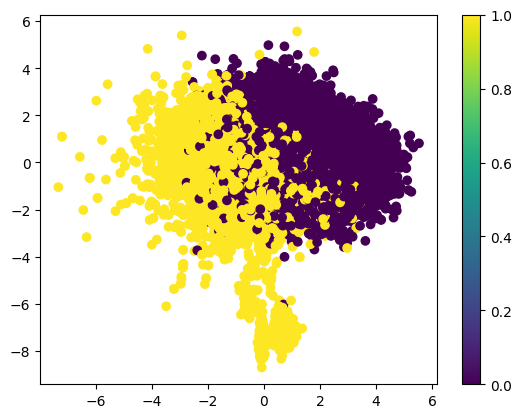

In [21]:
# plot X train vectors using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)

import matplotlib.pyplot as plt

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.colorbar()
plt. show()